In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import Statements
import pandas as pd
import numpy as np
import tensorflow as tf
#Encoder
from sklearn.preprocessing import LabelEncoder

# Imputer
from sklearn.impute import KNNImputer

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt


#Models
from tensorflow.keras.models import save_model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import accuracy_score, roc_auc_score



In [ ]:
#Loading the dataset
churn_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv")

In [ ]:
#Showing the Dataset
churn_df
#Creating a dataset as a copy of the original dataset
new_churn_df = churn_df.copy()

In [ ]:
#Displaying the information of the dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
new_churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


##Question 1
###Using the given dataset to extract the relevant features that can define a customer churn.

In [ ]:
#Droping irrelevant column
churn_df.drop('customerID', axis=1, inplace=True)
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce', downcast = 'float')
churn_df.info()
# What we expect to see is the column TotalCharges to change to type float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#Checking to see if there are any missing values
churn_df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#Using KNNImputer to attempt to impute the missing values
imputer = KNNImputer(n_neighbors = 6)

churn_df[['TotalCharges']] = imputer.fit_transform(churn_df[['TotalCharges']])
churn_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#Using label encoding to encode all columns in the churn_df dataframe as integers to allow for easier processing by algorithms
new_churn_df = churn_df.copy()
label_encoder = LabelEncoder()

for i in churn_df.select_dtypes(['object']):
    churn_df[i] = label_encoder.fit_transform(churn_df[i])

churn_df.info()

# What we expect to see are most of the columns data type switching from 'Object' to 'int64'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.850000,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.500000,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.150002,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.750000,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.649994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.500000,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.899902,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.450012,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.600006,1


In [ ]:
#Calculating the correlation matrix for the features in the dataframe and extracting the relevant features based on
#their correlation strength to the target variable 'Churn'
correlation_matrix = churn_df.corr()
target_feature = correlation_matrix['Churn'].abs().sort_values(ascending=False)
relevant_features = target_feature[~target_feature.index.str.contains('Churn')]
relevant_features

Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TechSupport         0.282492
TotalCharges        0.199428
OnlineBackup        0.195525
MonthlyCharges      0.193356
PaperlessBilling    0.191825
DeviceProtection    0.178134
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.107062
InternetService     0.047291
StreamingMovies     0.038492
MultipleLines       0.038037
StreamingTV         0.036581
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64

In [ ]:
#selecting a specified number of top relevant features based on their absolute correlation with the target variable 'Churn'
#and excluding 'Churn' itself from the top features
num_features_to_select = 9
top_relevant_features = target_feature.abs().sort_values(ascending=False).index[:num_features_to_select].tolist()
top_relevant_features.remove('Churn')
top_relevant_features

['Contract',
 'tenure',
 'OnlineSecurity',
 'TechSupport',
 'TotalCharges',
 'OnlineBackup',
 'MonthlyCharges',
 'PaperlessBilling']

#Question 2
###Using Exploratory Data Analysis (EDA) skills to find out which customer profiles relate to churning a lot.



In [ ]:
#Creating a new column 'Customer profile' by combing other existing colums
new_churn_df['Customer_profile'] = new_churn_df['gender'].astype(str) + '_' + \
new_churn_df['SeniorCitizen'].map({0: 'non-senior', 1:'senior'}).astype(str)+ '_' + \
new_churn_df['Partner'].astype(str) + '_' + new_churn_df['Dependents'].astype(str)

#Creating a dataframe to show the count of each unique 'Customer_profile'
pd.DataFrame(new_churn_df['Customer_profile'].value_counts())

,Customer_profile
Male_non-senior_No_No,1381
Female_non-senior_No_No,1338
Female_non-senior_Yes_Yes,844
Male_non-senior_Yes_Yes,822
Female_non-senior_Yes_No,596
Male_non-senior_Yes_No,567
Female_senior_No_No,317
Male_senior_Yes_No,281
Male_senior_No_No,244
Male_non-senior_No_Yes,211


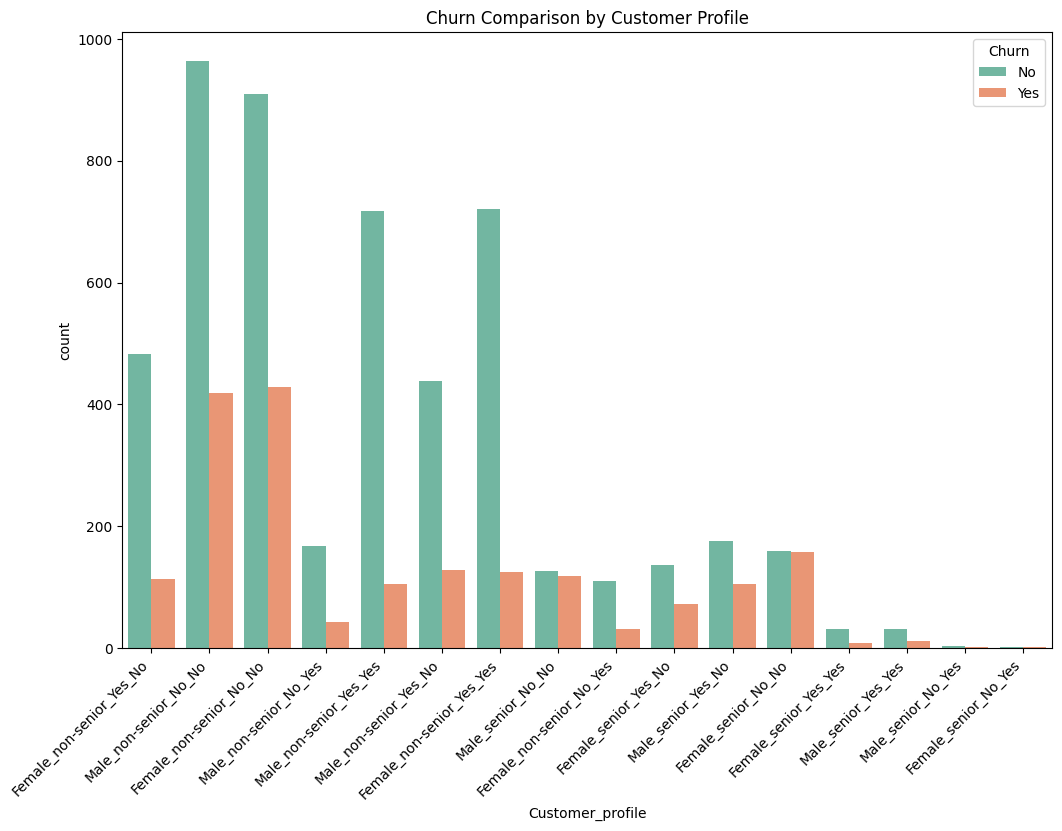

In [ ]:
#using the seaborn library to create a countplot that visualizes the comparison of churn across different customer profiles.
plt.figure(figsize=(12, 8))
sns.countplot(x='Customer_profile', hue='Churn', data=new_churn_df, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Churn Comparison by Customer Profile')
plt.show()

#Question 3
###Using the features i defined in question (1) define and train a Multi-Layer Perceptron model using the Functional API

In [ ]:
#creating a feature subset of the top correlated features with the churn
top_features= churn_df[top_relevant_features]
top_features

,Contract,tenure,OnlineSecurity,TechSupport,TotalCharges,OnlineBackup,MonthlyCharges,PaperlessBilling
0,0,1,0,0,29.850000,2,29.85,1
1,1,34,2,0,1889.500000,0,56.95,0
2,0,2,2,0,108.150002,2,53.85,1
3,1,45,2,2,1840.750000,0,42.30,0
4,0,2,0,0,151.649994,0,70.70,1
...,...,...,...,...,...,...,...,...
7038,1,24,2,2,1990.500000,0,84.80,1
7039,1,72,0,0,7362.899902,2,103.20,1
7040,0,11,2,0,346.450012,0,29.60,1
7041,0,4,0,0,306.600006,0,74.40,1


In [72]:
# Choosing the dependent and independent variables
X = top_features
y = churn_df['Churn']

scaler = StandardScaler()
X = scaler.fit_transform(X.copy())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''
# Define the preprocessor
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), list(X.columns))
    ],
    remainder='passthrough'
)'''


"\n# Define the preprocessor\nscaler = StandardScaler()\npreprocessor = ColumnTransformer(\n    transformers=[\n        ('num', StandardScaler(), list(X.columns))\n    ],\n    remainder='passthrough'\n)"

In [73]:
# Defining the architecture of the MLP model using the Keras Functional API
inputs = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
x = Dense(8, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

# Creating the model using the Functional API
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluating the model on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculating and printing the accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')


Epoch 1/20
141/141 [==============================] - 1s 4ms/step - loss: 0.4662 - accuracy: 0.7695 - val_loss: 0.4236 - val_accuracy: 0.7870
Epoch 2/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4412 - accuracy: 0.7863 - val_loss: 0.4112 - val_accuracy: 0.7933
Epoch 3/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4356 - accuracy: 0.7912 - val_loss: 0.4078 - val_accuracy: 0.8012
Epoch 4/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4314 - accuracy: 0.7908 - val_loss: 0.4123 - val_accuracy: 0.8012
Epoch 5/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4309 - accuracy: 0.7943 - val_loss: 0.4104 - val_accuracy: 0.7950
Epoch 6/20
141/141 [==============================] - 1s 4ms/step - loss: 0.4290 - accuracy: 0.7961 - val_loss: 0.4052 - val_accuracy: 0.8004
Epoch 7/20
141/141 [==============================] - 1s 4ms/step - loss: 0.4263 - accuracy: 0.8005 - val_loss: 0.4073 - val_accuracy: 0.8004
Epoch 

In [74]:
# Define the MLP model
mlp_model = MLPClassifier(max_iter=100)

# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (32,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Perform cross-validated grid search
grid_search = GridSearchCV(mlp_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Define the MLP model
#mlp_model = MLPClassifier(max_iter=100)

# Create a pipeline with preprocessing and MLP model
#pipeline = Pipeline([
    #('preprocessor', preprocessor),
    #('mlpclassifier', mlp_model)
#])

# Define the hyperparameter grid
#param_grid = {
    #'mlpclassifier__hidden_layer_sizes': [(64, 32), (128, 64), (32,)],
    #'mlpclassifier__activation': ['relu', 'tanh', 'logistic'],
    #'mlpclassifier__solver': ['adam', 'sgd'],
    #'mlpclassifier__learning_rate': ['constant', 'invscaling', 'adaptive'],
#}

# Perform cross-validated grid search
#grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
#grid_search.fit(X_train, y_train)

# Get the best model
#best_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [76]:
# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Test Accuracy: 0.808374733853797
Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (64, 32), 'learning_rate': 'constant', 'solver': 'adam'}


In [82]:
'''
# Preprocessing using StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), top_features.columns.tolist())
    ],
    remainder='passthrough'
)

# Create MLP model with the best hyperparameters
mlp_model = MLPClassifier(
    activation='relu',
    alpha=0.0001,
    hidden_layer_sizes=(32,),
    learning_rate='adaptive',
    solver='adam'
)

# Create a pipeline with preprocessing and MLP model
pipeline = make_pipeline(preprocessor, mlp_model)




# Train the model (assuming X_train and y_train are your training data)
pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
'''
best_params = {'activation': 'tanh', 'hidden_layer_sizes': (64, 32), 'learning_rate': 'constant', 'solver': 'adam'}

tuned_mlp_model = MLPClassifier(
    activation=best_params['activation'],
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    learning_rate=best_params['learning_rate'],
    solver=best_params['solver'])

tuned_mlp_model.fit(X_train, y_train)

y_pred = tuned_mlp_model.predict(X_test)


# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8062455642299503


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#Question 4
###Evaluating the model’s accuracy and calculating the AUC score

In [83]:
# Evaluate the model on the test set
y_pred = tuned_mlp_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

# Calculate and print the AUC score
auc_score = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc_score}')

Accuracy: 0.8062455642299503
AUC Score: 0.7309861086670739


In [91]:
import joblib
import pickle


# Save the scikit-learn pipeline (including MLPClassifier) using joblib
#joblib.dump(best_model, 'churning_model.pkl')

joblib.dump(tuned_mlp_model, 'tuned_mlp_model.h5')


['tuned_mlp_model.h5']

In [88]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [89]:
with open('label.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [ ]:
!pip freeze > requirements.txt